In [8]:
from core.preprocessing import make_small_train, make_small_dev
from core.problems import SumToSumARIMA
import numpy as np
import pandas as pd
df = pd.read_pickle('data/master_dataset.pkl').fillna(0)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', palette='colorblind', context='talk')
from time import time

In [5]:
train_df = make_small_train(df, 'combined')
test_df = make_small_dev(df)

In [6]:
prob = SumToSumARIMA(train_df)

In [9]:
ti = time()
prob.train(order=(12,0,1))
tf = time()
print('training took {:1f} seconds'.format(tf - ti))

/Users/bennetmeyers/.virtualenvs/sc/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


training took 7.423820 seconds


In [10]:
ti = time()
prob.test(test_df['total_power'])
tf = time()
print('testing took {:1f} seconds'.format(tf - ti))

testing took 11.847307 seconds


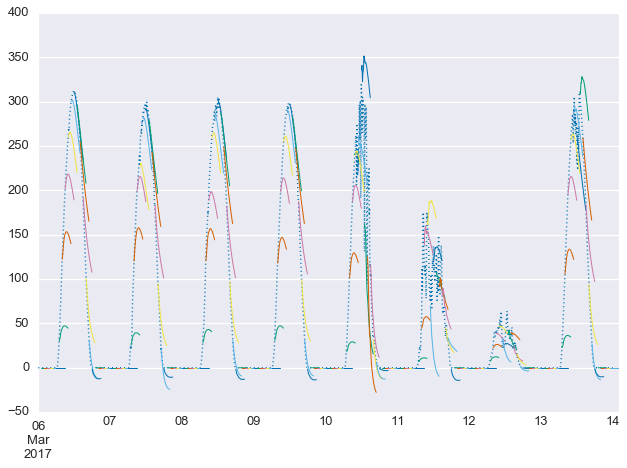

In [11]:
prob.plot_test()

In [12]:
prob.calc_mse()

3697.3101099513333